## **Predicting the price of houses using Linear Regression**

### **Importing the required libraries**

In [77]:
import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt  #to plot graphs
import seaborn as sns  #to plot graphs
from sklearn.linear_model import LinearRegression   #for linear regression model
sns.set()  #setting seaborn as default 

import warnings
warnings.filterwarnings('ignore')

### **Reading the dataset**

In [78]:
#reading the input data
data=pd.read_csv('Housing.csv')   
data.head()   

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [79]:
data.tail(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


### **Understanding our data**

In [80]:
data.shape

(545, 13)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [82]:
data.describe(include ='all')   #parameter include=all will display NaN values as well

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


### **Checking for NULL values**

In [83]:
data.isnull().sum() # No null values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### **Data Preparation**

a) YES/NO categories

It is seen that there are some columns with categorical values like 'YES' or 'NO'. We need to change them to 0 and 1

In [84]:
#first fetch all the categorical columns with Yes and NO
categorical =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [85]:
data[categorical]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,yes,no,no,no,yes,yes
1,yes,no,no,no,yes,no
2,yes,no,yes,no,no,yes
3,yes,no,yes,no,yes,yes
4,yes,yes,yes,no,yes,no
...,...,...,...,...,...,...
540,yes,no,yes,no,no,no
541,no,no,no,no,no,no
542,yes,no,no,no,no,no
543,no,no,no,no,no,no


In [86]:
#function to change yes to 1 and no to 0
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

In [87]:
# now replace yes and no with 1 and 0 in our dataset
data[categorical] = data[categorical].apply(binary_map)
data[categorical]

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0
...,...,...,...,...,...,...
540,1,0,1,0,0,0
541,0,0,0,0,0,0
542,1,0,0,0,0,0
543,0,0,0,0,0,0


In [88]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


b) Dummy variable

Dummy Variables - Now the last column(furnishingstatus) has 3 categories i.e. furnished,semi-furnished and unfurnished. We need to convert this to numbers as well

In [89]:
table = pd.get_dummies(data['furnishingstatus'])   #add the column into table variable
table.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


furnished will be 00 and to avoid redudency we drop it. semi-furnished will be 10 and unfurnished will be 01

In [90]:
#recreating table but now dropping the first column(furnished)
table = pd.get_dummies(data['furnishingstatus'], drop_first = True) 
table.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [91]:
#adding the other two columns to our data set
data = pd.concat([data, table], axis = 1)  
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [92]:
#dropping the old column from the dataset
data.drop(['furnishingstatus'], axis = 1, inplace = True) 
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


### **Plots on the graph** 

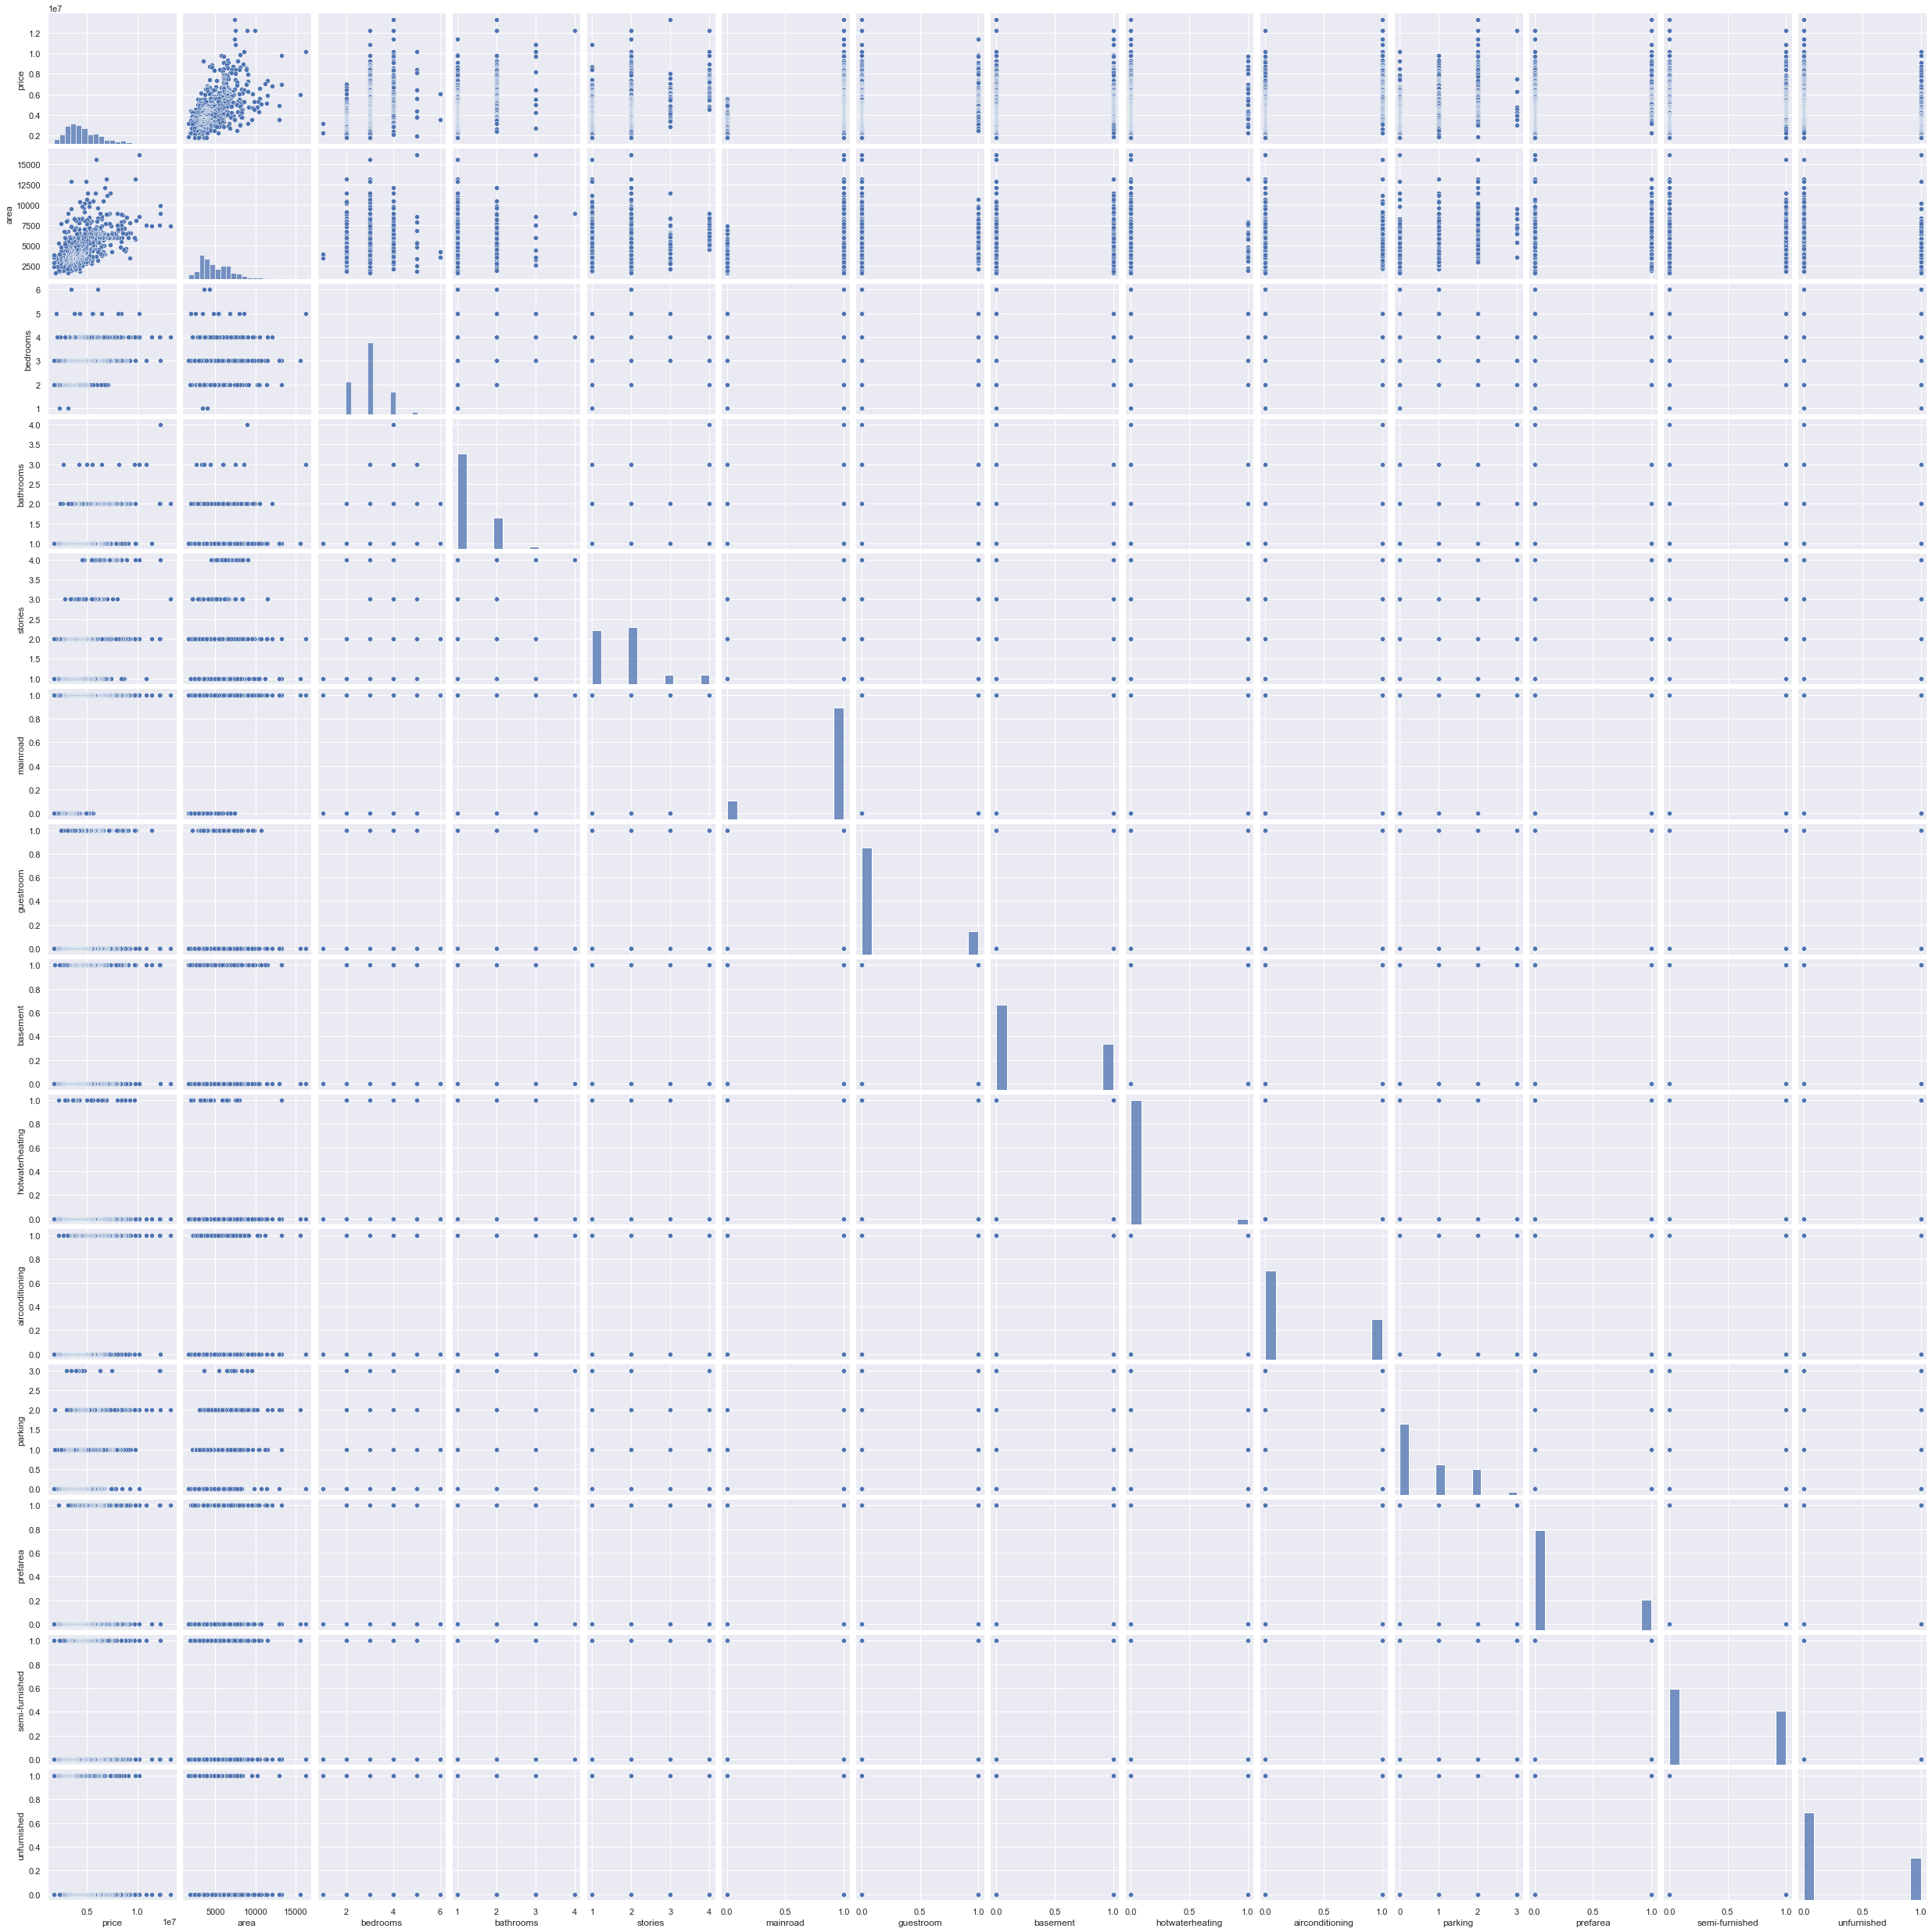

In [93]:
sns.pairplot(data)
plt.show()

### **Splitting data into Training and Testing data**

In [94]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [95]:
from sklearn.model_selection import train_test_split
np.random.seed(0) #so data can have same values
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [96]:
df_train.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,1
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,1,0
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,0,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,0,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,1


### **Scaling Training Data: MinMaxScaler**

In [97]:
from sklearn.preprocessing import MinMaxScaler    #to make all the numbers to the same scale
scaler = MinMaxScaler()

In [98]:
#applying scale to all numerical columns(not the yes/no and dummy columns)
var_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

In [99]:
#applying the scaled values to our training data set
df_train[var_to_scale] = scaler.fit_transform(df_train[var_to_scale])  


In [100]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


### **Training the model**

In [102]:
# only output price is poped out of df_Train and put into y_train
y_train = df_train.pop('price') 
x_train = df_train

In [103]:
y_train.head()

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
Name: price, dtype: float64

In [104]:
#using linear regression
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [105]:
linear_reg.coef_

array([ 0.23466354,  0.04673453,  0.19082319,  0.10851563,  0.05044144,
        0.03042826,  0.02159488,  0.08486327,  0.06688093,  0.06073533,
        0.05942788,  0.00092052, -0.03100561])

In [106]:
#values from 0 to 1
#0 model explain None of the variability
#1 model explain Entire of the variability
linear_reg.score(x_train,y_train)

0.6814893088451202

### **Scaling Test Data: MinMaxScaler**

In [107]:
var_to_scale = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

In [108]:
df_test[var_to_scale] = scaler.fit_transform(df_test[var_to_scale])

## **Testing our model**

In [109]:
y_test = df_test.pop('price')
x_test = df_test

In [110]:
#predict the output(predictions) using the test data
predictions = linear_reg.predict(x_test)

### **Checking R squared value**

In [111]:
from sklearn.metrics import r2_score 
r2_score(y_test, predictions)

0.599557533872853

### **Comparing the actual and predicted values**

In [112]:
#AttributeError: 'Series' object has no attribute 'flatten' --to avoid this error in the next step
y_test.shape
y_test_matrix = y_test.values.reshape(-1,1)


In [113]:
#load actual and predecited values side by side
dframe=pd.DataFrame({'actual':y_test_matrix.flatten(),'Predicted':predictions.flatten()}) 
#flatten toget single axis of data (1 dimension only)

In [114]:
dframe.head(15)

,actual,Predicted
0,0.247651,0.202410
1,0.530201,0.374464
2,0.328859,0.305654
3,0.261745,0.293786
4,0.245638,0.258827
5,0.275168,0.189463
6,0.644295,0.499099
7,0.328859,0.297637
8,0.087248,0.122528
9,0.395973,0.316860


### **Plotting the Graph**

Text(0, 0.5, 'Predicted')

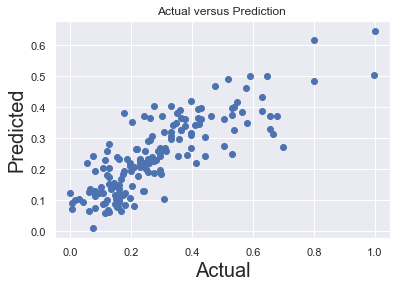

In [115]:
#using scatter plot compare the actual and predicted data
fig = plt.figure()
plt.scatter(y_test,predictions)
plt.title('Actual versus Prediction ')
plt.xlabel('Actual', fontsize=20)                         
plt.ylabel('Predicted', fontsize=20)                         